Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.2/12.2 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 122.3/122.3 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 632.6/632.6 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 50.3/50.3 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 44.9/44.9 kB ? eta 0:00:00
     -------------------------------------- 431.7/431.7 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 183.0/183.0 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 3.1 MB/s eta 0:00:00
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
     ---------------------------------------- 2.0/2.0 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 6.2/6.2 MB 3.6 MB/s eta 0:0


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


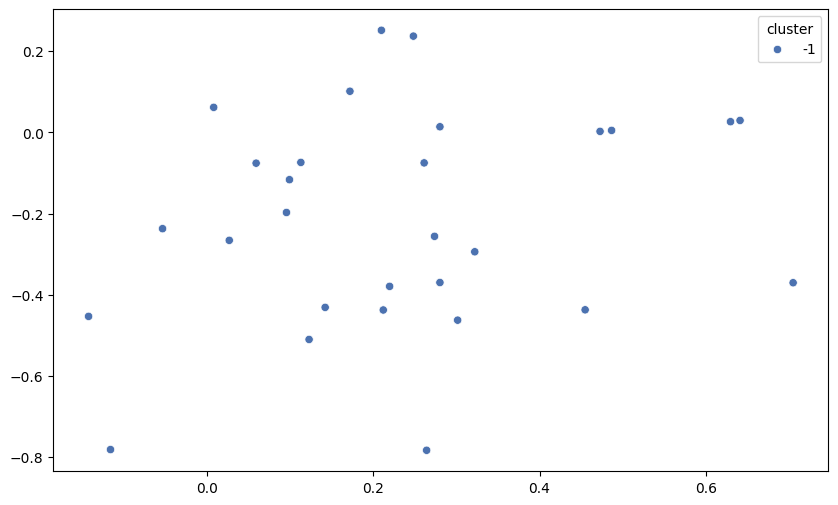


Cluster -1:
['Mudflows prompted the closures of at least some roads, including in Topanga Canyon and on parts of the Pacific Coast Highway.', 'Jeremy Allen White is attached to star in a Netflix limited series adaptation of the André Aciman novel "Enigma Variations"', "A government spokesman says information provided by Hamas overnight matches Israel's intelligence.", "Four planets will be in the parade in January, while seven will align in February. Here's how to see the events.", 'Any Republican opposition could doom the top intelligence nominee’s confirmation.', "Hundreds of thousands of Palestinians streamed into Gaza's most heavily destroyed area after Israel lifted its closure of the north for the first time since the early weeks of the 15-month war with Hamas. And Israel says eight of the hostages to be freed in t…", "The Google Pixel 9a is right around the corner. As we exclusively revealed in October, Google is slated to release the Pixel 9a in mid-March, which isn't", 'The M

In [8]:
# !pip3 install newsapi-python nltk spacy pandas numpy scikit-learn matplotlib seaborn

# %pip install newsapi-python
# %pip install spacy

from newsapi import NewsApiClient
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import spacy
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

# Ensure the spacy model is downloaded
# !python -m spacy download en_core_web_sm

# Initialize News API (Replace 'YOUR_API_KEY' with your actual API key)
newsapi = NewsApiClient(api_key='fa44c6cae5c94f739b7db22c2c7cc475')

# Fetch latest news articles
articles = newsapi.get_top_headlines(language='en', page_size=50)  # Fetch 50 news articles

# Extract descriptions
descriptions = [article['description'] for article in articles['articles'] if article['description']]

# Preprocess text
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

def pre_process_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase & tokenize
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens if w.isalpha()]  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    words = [w for w in stripped if w not in stop_words]  # Remove stopwords
    return " ".join(words)

processed_descriptions = [pre_process_text(desc) for desc in descriptions]

# Convert text to vectors
def get_vector(text):
    return nlp(text).vector

vectors = np.array([get_vector(desc) for desc in processed_descriptions])

# Apply DBSCAN Clustering
clustering = DBSCAN(eps=0.5, min_samples=5).fit(vectors)

# Create DataFrame for visualization
df = pd.DataFrame({'description': descriptions, 'cluster': clustering.labels_})

# Plot Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=vectors[:,0], y=vectors[:,1], hue=df['cluster'], palette="deep")
plt.show()

# Print Clustered Articles
for cluster in set(df['cluster']):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster]['description'].tolist())


In [ ]:
import numpy as np
import pandas as pd
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Ensure necessary NLP resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the 'punkt_tab' data package
nltk.download('punkt_tab') # This line is added to download the missing data package.

nlp = spacy.load("en_core_web_sm")

# Define categories (Using valid 20Newsgroups categories)
categories = ['rec.sport.baseball', 'rec.sport.hockey', 'sci.med', 'sci.space', 'talk.politics.misc', 'comp.graphics']

# Fetch News Dataset
train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Combine Training & Test Data
all_texts = train_data.data + test_data.data

# Text Preprocessing Function
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())  # Convert to lowercase & tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation & numbers
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Apply Preprocessing
processed_texts = [preprocess_text(text) for text in all_texts]

# Convert Text to Numerical Features (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(max_features=1000)  # Using 1000 most important words
X_tfidf = vectorizer.fit_transform(processed_texts).toarray()

# Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
clusters = dbscan.fit_predict(X_tfidf)

# Convert to DataFrame
df = pd.DataFrame({'text': all_texts, 'cluster': clusters})

# Visualizing Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="deep", alpha=0.7)
plt.title("DBSCAN Clustering of News Articles")
plt.show()

# Display Sample Clustered News Articles
for cluster in set(df['cluster']):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster]['text'].tolist()[:3])  # Show 3 samples per cluster

In [3]:


from newsapi import NewsApiClient
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import spacy
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups


In [4]:

categories = ['business', 'entertainment', 'general', 'health', 'science', 'sports', 'technology']

train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

len(train_data.data), len(test_data.data)

KeyboardInterrupt: 

In [5]:
import numpy as np
import pandas as pd
import nltk
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Ensure necessary NLP resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

# Define categories (Using valid 20Newsgroups categories)
categories = ['rec.sport.baseball', 'rec.sport.hockey', 'sci.med', 'sci.space', 'talk.politics.misc', 'comp.graphics']

# Fetch News Dataset
train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Combine Training & Test Data
all_texts = train_data.data + test_data.data

# Text Preprocessing Function
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())  # Convert to lowercase & tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation & numbers
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Apply Preprocessing
processed_texts = [preprocess_text(text) for text in all_texts]

# Convert Text to Numerical Features (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(max_features=1000)  # Using 1000 most important words
X_tfidf = vectorizer.fit_transform(processed_texts).toarray()

# Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
clusters = dbscan.fit_predict(X_tfidf)

# Convert to DataFrame
df = pd.DataFrame({'text': all_texts, 'cluster': clusters})

# Visualizing Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="deep", alpha=0.7)
plt.title("DBSCAN Clustering of News Articles")
plt.show()

# Display Sample Clustered News Articles
for cluster in set(df['cluster']):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster]['text'].tolist()[:3])  # Show 3 samples per cluster


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 

In [ ]:


# Fetch latest news articles
articles = newsapi.get_top_headlines(language='en', page_size=50)  # Fetch 50 news articles

# Extract descriptions
descriptions = [article['description'] for article in articles['articles'] if article['description']]

# Preprocess text
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

def pre_process_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase & tokenize
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens if w.isalpha()]  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    words = [w for w in stripped if w not in stop_words]  # Remove stopwords
    return " ".join(words)

processed_descriptions = [pre_process_text(desc) for desc in descriptions]

# Convert text to vectors
def get_vector(text):
    return nlp(text).vector

vectors = np.array([get_vector(desc) for desc in processed_descriptions])

# Apply DBSCAN Clustering
clustering = DBSCAN(eps=0.5, min_samples=5).fit(vectors)

# Create DataFrame for visualization
df = pd.DataFrame({'description': descriptions, 'cluster': clustering.labels_})

# Plot Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=vectors[:,0], y=vectors[:,1], hue=df['cluster'], palette="deep")
plt.show()

# Print Clustered Articles
for cluster in set(df['cluster']):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster]['description'].tolist())
